In [1]:
pip install pandas numpy tensorflow scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the synthetic dataset from the CSV file
df = pd.read_csv('synthetic_bipolar_disorder_data.csv')

# Display the first few rows of the dataset
print(df.head())

# Encode categorical variables (Gender, Ethnicity, Substance_Use, etc.)
label_encoders = {}
for column in ['Gender', 'Ethnicity', 'Substance_Use', 'Risk_Taking_Behavior',
               'Medication_Adherence', 'Treatment_History', 'Traumatic_Life_Events', 'Social_Support']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store the encoders for potential reverse transformation

# Separate the features (X) and the target (y)
# For demonstration, we will predict 'Manic_Episodes' as the target (you can choose other features)
X = df.drop(columns=['Manic_Episodes'])  # Features (all columns except 'Manic_Episodes')
y = df['Manic_Episodes']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the numerical features (use StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the shapes of the training and test sets
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")


   Age      Gender Ethnicity  Family_History_Bipolar  \
0   22  Non-binary     Black                       0   
1   57        Male     Asian                       0   
2   44      Female     Other                       1   
3   37        Male     Black                       0   
4   18        Male     White                       0   

   Family_History_Depression  Sleep_Patterns  Mood_Swings_Frequency  \
0                          0        7.712409                      0   
1                          1        4.790815                      4   
2                          0        4.899908                      5   
3                          0        7.599986                      2   
4                          1        8.162401                      6   

  Substance_Use Risk_Taking_Behavior  Manic_Episodes  Depressive_Episodes  \
0  Occasionally                 High               0                    1   
1  Occasionally             Moderate               0                    1   
2    

In [4]:
# Define the model architecture
def build_model(input_size):
    model = Sequential()
    
    # Input Layer + Hidden Layers
    model.add(Dense(500, input_dim=input_size, activation='relu'))
    model.add(Dense(1500, activation='relu'))
    model.add(Dense(1199, activation='relu'))
    
    # Output Layer (Binary classification for 'Manic_Episodes')
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Build the model with input size equal to the number of features
model = build_model(X_train.shape[1])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


c:\Users\BlairDupre\Documents\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1500)           │       751,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1199)           │     1,799,699 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         1,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,562,399 (9.77 MB)

 Trainable params: 2,562,399 (9.77 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.4940 - loss: 0.7080 - val_accuracy: 0.4969 - val_loss: 0.6971
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.5282 - loss: 0.6928 - val_accuracy: 0.4994 - val_loss: 0.7026
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.5165 - loss: 0.6923 - val_accuracy: 0.4787 - val_loss: 0.7042
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.5547 - loss: 0.6838 - val_accuracy: 0.4913 - val_loss: 0.7033
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.5647 - loss: 0.6770 - val_accuracy: 0.5000 - val_loss: 0.7230
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.5939 - loss: 0.6590 - val_accuracy: 0.4919 - val_loss: 0.7329
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.6096 - loss: 0.6456 - val_accuracy: 0.4863 - val_loss: 0.7384
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.6454 - loss: 0.6177 - val_acc

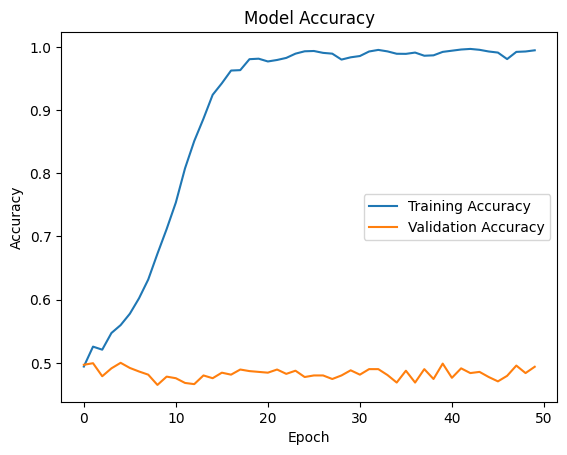

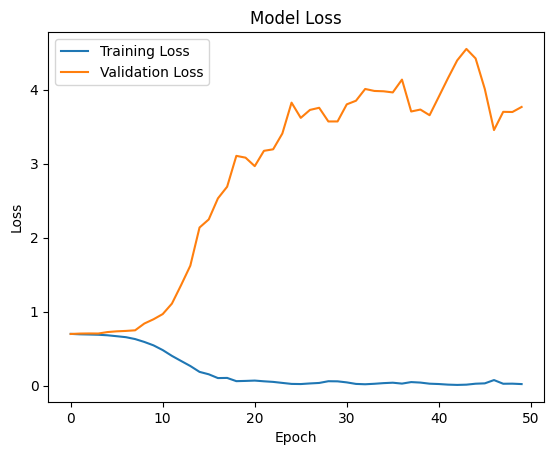

In [5]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
